In [2]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

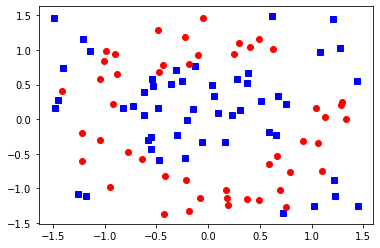

In [3]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

# Training process of linear classification

In [4]:
lam = 0.1

def gaussian_m(x, feature_num):
  np.random.seed(feature_num)
  data_num = x.shape[0]
  x_z = np.zeros((feature_num, 2))
  for i in range(feature_num):
    x_z[i] = x[np.random.randint(data_num)]
  return x_z

def input_features(x, feature_num, alpha):
  means = gaussian_m(x, feature_num)
  data_num = x.shape[0]
  features = np.zeros((data_num, feature_num))
  for i in range(data_num):
    diff = means - x[i]
    features[i] = np.exp(-alpha * np.sum(diff * diff, axis = 1))

  return np.hstack([features, np.ones((data_num, 1))])

def loss(x, hat_W, gt_labels):
  pred = np.dot(x, hat_W)
  diff = pred - gt_labels
  return (0.5 * np.dot(diff, diff) + lam * np.dot(hat_W, hat_W)) / x.shape[0]

def gradient(x, hat_W, gt_labels):
  return (np.dot(x.T, (np.dot(x, hat_W) - gt_labels)) + 2 * lam * hat_W) / x.shape[0]

def train(feature_num, alpha, training_data, training_labels):
  x = training_data
  data_num = x.shape[0]
  hat_W = np.random.rand(feature_num + 1)

  loss_historys = [loss(x, hat_W, training_labels)]
  loss_diff = []
  for i in range(100):
    hat_W -= 0.01 * gradient(x, hat_W, training_labels)
    cur_loss = loss(x, hat_W, training_labels)
    loss_diff.append(loss_historys[i - 1] - cur_loss)
    loss_historys.append(cur_loss)

  # plt.plot(loss_diff, linewidth=0.5, markersize=1)
  return hat_W

def process(feature_num, training_num, alpha, dataset):
  x = input_features(dataset, feature_num, alpha)

  # split into training and test dataset
  training, test = np.split(x, [training_num])
  training_label, test_label = np.split(y_d1, [training_num])

  w = train(feature_num, alpha, training, training_label)
  pred = np.dot(test, w)

  return pred
  
def export_pdf(filename):
  pp = PdfPages(filename)
  pp.savefig()
  pp.close()

In [13]:
def plot_confusion_mat(cm):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, annot_kws={'size':16}); #annot=True to annotate cells

  # labels, title and ticks
  plot_font = {'size': 14}
  ax.set_xlabel('Predicted labels', fontdict=plot_font)
  ax.set_ylabel('True labels', fontdict=plot_font)
  ax.set_title('Confusion Matrix', fontdict=plot_font)
  ax.xaxis.set_ticklabels(['-1', '+1'])
  ax.yaxis.set_ticklabels(['-1', '+1'])
  plt.subplots_adjust(left=0.15)


# Verification of each hyper-parameter

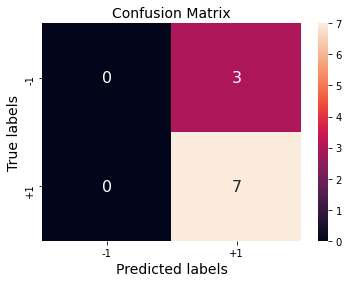

In [15]:
feature_num = 2
alpha = 4
training_num = 90


# train and predict
training_label, test_label = np.split(y_d1, [training_num])
res = process(feature_num, training_num, alpha, x_d1)
pred = (res > 0).astype(int) * 2 - 1

cm = confusion_matrix(test_label, pred, [-1, 1])
plot_confusion_mat(cm)
export_pdf(f"feature_num_{feature_num}_alpha_{alpha}_training_num_{training_num}.pdf")

0.4


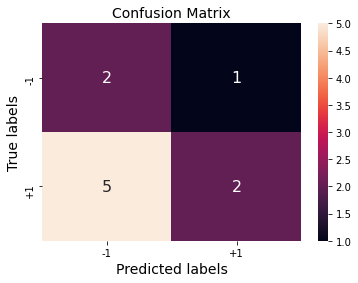

In [16]:
feature_num = 5
alpha = 4
training_num = 90

# train and predict
training_label, test_label = np.split(y_d1, [training_num])
res = process(feature_num, training_num, alpha, x_d1)
pred = (res > 0).astype(int) * 2 - 1
cnt = np.count_nonzero(test_label - pred == 0)
print(cnt / (100 - training_num))

cm = confusion_matrix(test_label, pred, [-1, 1])
plot_confusion_mat(cm)

export_pdf(f"feature_num_{feature_num}_alpha_{alpha}_training_num_{training_num}.pdf")

0.6


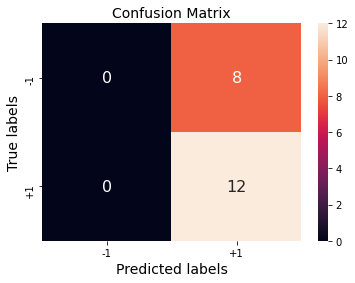

In [17]:
feature_num = 2
alpha = 4
training_num = 80

# train and predict
training_label, test_label = np.split(y_d1, [training_num])
res = process(feature_num, training_num, alpha, x_d1)
pred = (res > 0).astype(int) * 2 - 1
cnt = np.count_nonzero(test_label - pred == 0)
print(cnt / (100 - training_num))

cm = confusion_matrix(test_label, pred, [-1, 1])
plot_confusion_mat(cm)

export_pdf(f"feature_num_{feature_num}_alpha_{alpha}_training_num_{training_num}.pdf")

0.3


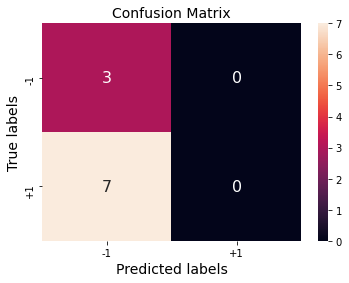

In [18]:
feature_num = 5
alpha = 0.1
training_num = 90

# train and predict
training_label, test_label = np.split(y_d1, [training_num])
res = process(feature_num, training_num, alpha, x_d1)
pred = (res > 0).astype(int) * 2 - 1
cnt = np.count_nonzero(test_label - pred == 0)
print(cnt / (100 - training_num))

cm = confusion_matrix(test_label, pred, [-1, 1])
plot_confusion_mat(cm)

export_pdf(f"feature_num_{feature_num}_alpha_{alpha}_training_num_{training_num}.pdf")